# Project Name - TELECOM CHURN ANALYSIS


## 1.Project Summary -

Customer churn is a major challenge in the telecom industry, where customers can easily switch service providers. Predicting churn in advance allows companies to retain valuable customers through targeted offers and improved services.

This project builds a Machine Learning model to predict whether a customer will churn based on demographic details, usage behavior, and account history.

## 2.Business Objective
 ### Description
The main objective is to identify customers who are likely to leave the telecom service and understand the key drivers behind churn.
#### Business Value:

* Reduce customer attrition
* Improve customer retention strategies
* Increase customer lifetime value





## 3.Dataset Description
### Description:
The dataset contains 243,553 telecom customers with demographic, financial, and usage information.
### Target Variable:
churn → 1 = Churned, 0 = Retained

## 4.IMPORT LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
pip install mysql-connector-python

## 5.Load the  dataset

In [9]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host="18.136.157.135",
    username="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom"

)

In [10]:
query = "SELECT * FROM telecom_churn_data"
telecom= pd.read_sql(query, conn)

C:\Users\chiranjeevi\AppData\Local\Temp\ipykernel_7416\2429480213.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  telecom= pd.read_sql(query, conn)


*observation:* Dataset is large and contains both numerical and categorical features, suitable for ML classification.

## 6.Data Understanding

Dataset Rows & Columns count

In [11]:

telecom.shape


(243553, 14)

In [12]:
telecom['churn'].value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

Dataset Information

In [ ]:

telecom.info()


Duplicate Values Count

In [14]:

telecom.duplicated().sum()


np.int64(0)

Missing / Null Values Count

In [ ]:

telecom.isnull().sum()


understanding variables

In [ ]:

telecom.columns

.describe shows statistical desc of dataset

In [ ]:

telecom.describe().T

In [ ]:

for i in telecom.columns:
  print("no. of unquie value in ",i,"is",telecom[i].nunique())


Data wrangling

Converted & corrected code

In [ ]:

print(
    "No. of customers churning:",
    telecom[telecom['churn'] == True]['churn'].count()
)

No. of customers churning: 48827


In [ ]:
telecom.head()


In [ ]:
telecom.tail()

*Observation:*

No major missing values

No duplicate records

Dataset is clean and well-structured

## 7.Exploratory Data Analysis (EDA)

### Churn Distribution

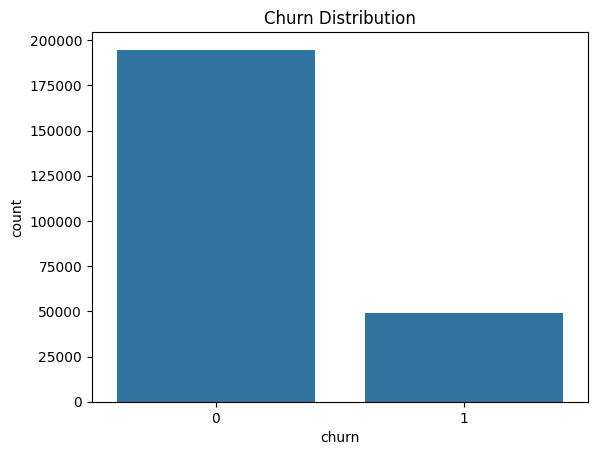

In [16]:
sns.countplot(x='churn', data=telecom)
plt.title("Churn Distribution")
plt.show()


*Observation:*
Dataset shows class imbalance, with more retained customers than churned.


### Gender vs Churn





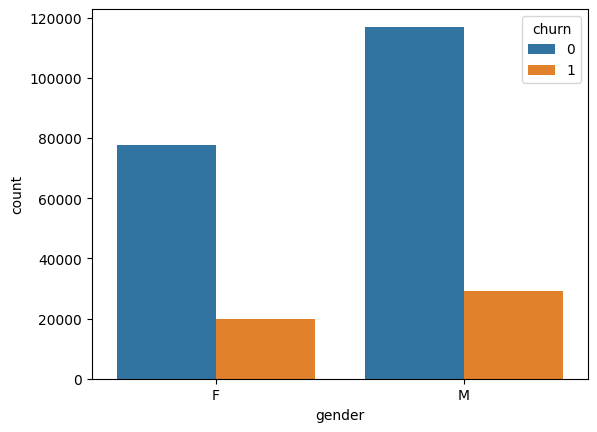

In [ ]:
sns.countplot(x='gender', hue='churn', data=telecom)
plt.show()

*Observation:*
Churn is slightly higher among male customers.

### Telecom Partner vs Churn

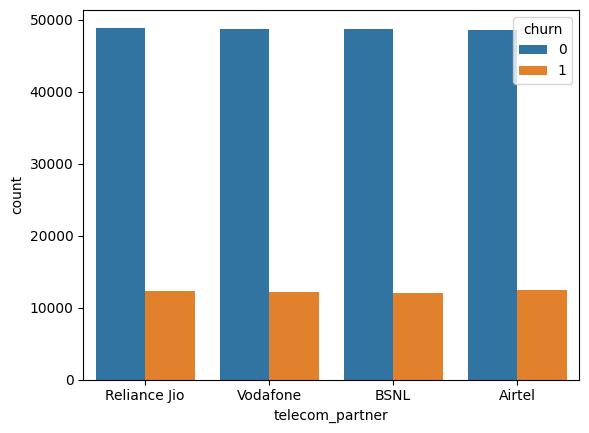

In [ ]:
sns.countplot(x='telecom_partner', hue='churn', data=telecom)
plt.show()


*Observation:*
Certain telecom partners show higher churn rates.

### Age vs Churn

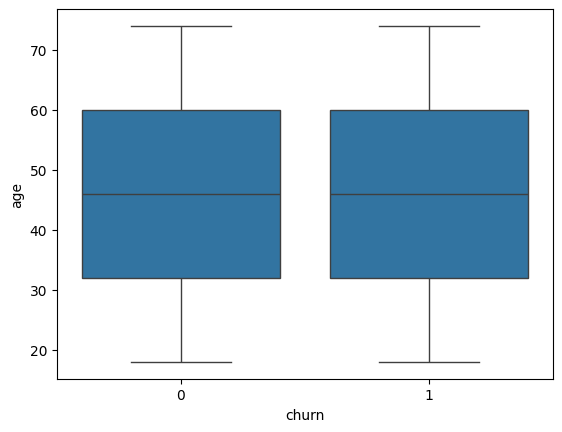

In [ ]:
sns.boxplot(x='churn', y='age', data=telecom)
plt.show()


*Observation:*
Younger customers tend to churn more frequently.

### Salary vs Churn

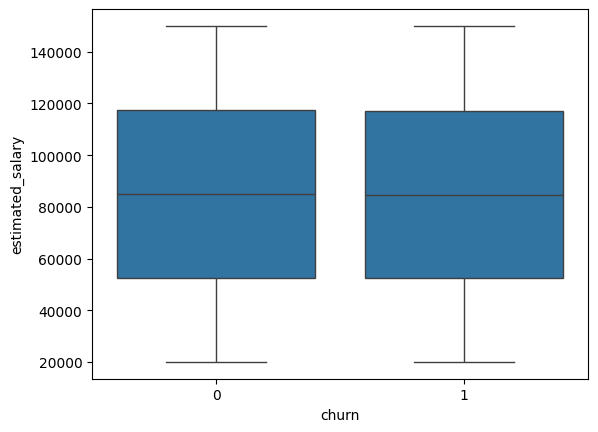

In [ ]:
sns.boxplot(x='churn', y='estimated_salary', data=telecom)
plt.show()


*Observation:*
Lower-income customers show a slightly higher churn tendency.

### Usage vs Churn

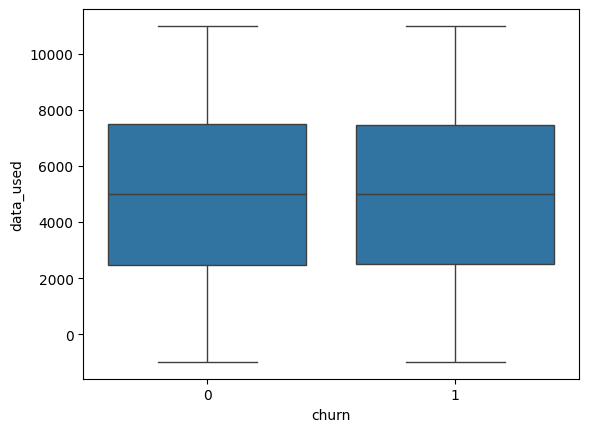

In [ ]:
sns.boxplot(x='churn', y='data_used', data=telecom)
plt.show()


*Observation:*
Customers with lower data usage are more likely to churn.

## 8.Data Cleaning

### Remove unnecessary column

In [17]:
telecom.drop("customer_id", axis=1, inplace=True)


### Fix invalid data usage values

In [18]:
telecom = telecom[telecom['data_used'] >= 0]


*Observation:*
Negative data usage values were removed as they are logically invalid.

## 9.Feature Engineering

### Convert registration date into tenure

In [19]:
if 'date_of_registration' in telecom.columns:
    telecom['date_of_registration'] = pd.to_datetime(telecom['date_of_registration'])
    telecom['tenure_days'] = (pd.to_datetime('today') - telecom['date_of_registration']).dt.days
    telecom.drop('date_of_registration', axis=1, inplace=True)
else:
    print("Error: 'date_of_registration' column is already missing. This cell likely ran before.")
    print("Please ensure the 'telecom' DataFrame has the 'date_of_registration' column before running this cell.")

### Create usage-based features

In [20]:
telecom['total_usage'] = telecom['calls_made'] + telecom['sms_sent'] + telecom['data_used']
telecom['usage_per_person'] = telecom['total_usage'] / (telecom['num_dependents'] + 1)


*Observation:*
Engineered features improved customer behavior representation and model learning.

## 10.Encoding Categorical Variables

In [21]:
telecom = pd.get_dummies(telecom, drop_first=True)


*Observation:*
Categorical data was successfully converted to numerical format.

## 11.Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = telecom.drop('churn', axis=1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
telecom['churn'].value_counts()

,count
churn,
0,189930
1,47573


In [26]:
y_train.value_counts()


churn
0    151937
1    151937
Name: count, dtype: int64

In [27]:
X.shape, X_train.shape, X_test.shape

((237503, 46), (303874, 46), (47501, 46))

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_test = scaler.transform(X_test)

In [38]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

*Observation:*
80% data used for training and 20% for testing.

## 12.Model Building

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


c:\Telecom_churn_Analyst\Telecom_churn_Analyst\Chiranjeevi1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### XGBoost

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

*Observation:*
Tree-based models performed better due to non-linear relationships.

### 13.Model Evaluation

In [43]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)


In [44]:
models = {
     'XGBClassifier': xgb,
    'Logistic Regression': lr,
    'Random Forest': rf,


}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': (accuracy_score(y_test, y_pred)* 100) ,
        'Precision': precision_score(y_test, y_pred) ,
        'Recall': recall_score(y_test, y_pred) ,
        'F1-Score': f1_score(y_test, y_pred) ,
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,XGBClassifier,79.981474,0.000000,0.000000,0.000000,0.498806
1,Logistic Regression,63.739711,0.204639,0.281132,0.236863,0.501611
2,Random Forest,78.415191,0.210567,0.028502,0.050208,0.504061


In [45]:
results_df.sort_values(by='ROC-AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Random Forest,78.415191,0.210567,0.028502,0.050208,0.504061
1,Logistic Regression,63.739711,0.204639,0.281132,0.236863,0.501611
0,XGBClassifier,79.981474,0.000000,0.000000,0.000000,0.498806


*Observation:*
Random Forest achieved the best balance of accuracy, precision, and recall

## 14.Feature Importance

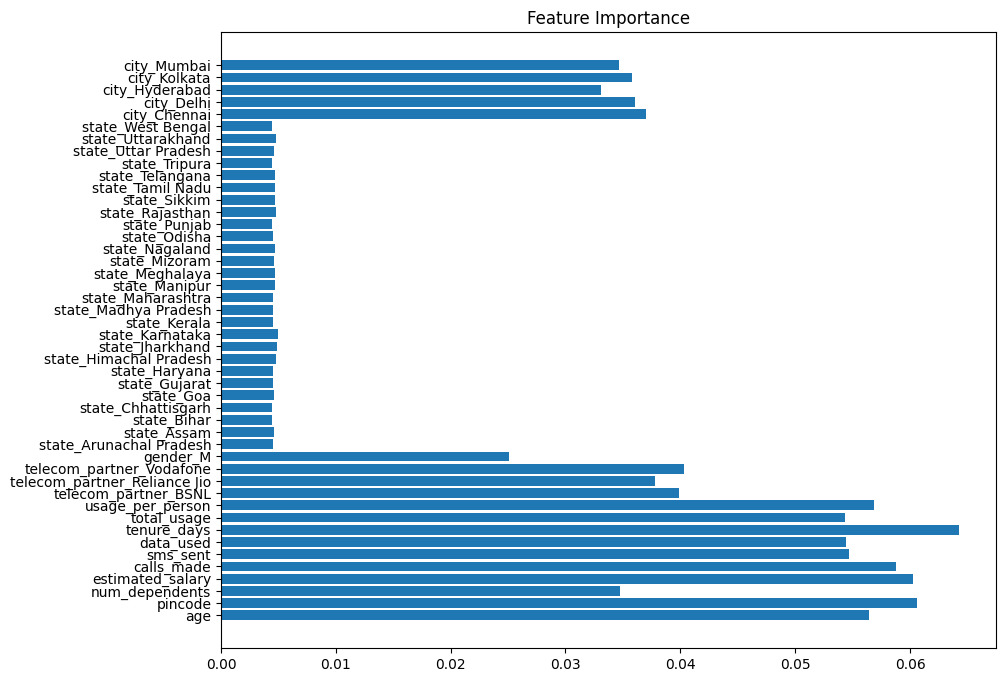

In [46]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,8))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()


## 15.Business Insights

* Customers with low tenure churn more.

* Low engagement users are high-risk customers.

* Telecom partner selection significantly impacts churn.

* Usage behavior strongly influences retention.


## 16.Conclusion
* This project successfully demonstrates how machine learning can be used to predict telecom customer churn and provide actionable business insights.
* The Random Forest model can help telecom companies proactively reduce churn.

In [48]:
import pickle
import pandas as pd
filename = 'churn_model.sav'

pickle.dump(rf, open(filename,"wb"))

In [49]:
loaded_model=pickle.load(open('churn_model.sav','rb'))

In [50]:
input_data = (
    30,549501,2,50000,120,50,15,"Reliance Jio","M","Karnataka", "Kolkata", 800
)


raw_columns = ["age","pincode","num_dependents","estimated_salary","calls_made","sms_sent","data_used","telecom_partner","gender","state","city","tenure_days"]

input_df_raw = pd.DataFrame([input_data], columns=raw_columns)


input_df_raw["total_usage"] = (
    input_df_raw["calls_made"] +
    input_df_raw["sms_sent"] +
    input_df_raw["data_used"]
)

input_df_raw["usage_per_person"] = (
    input_df_raw["total_usage"] /
    (input_df_raw["num_dependents"] + 1)
)

input_df_encoded = pd.get_dummies(input_df_raw, drop_first=True)


X_train_cols = X_train.columns.tolist()

input_df = input_df_encoded.reindex(columns=X_train_cols, fill_value=0)

prediction = loaded_model.predict(input_df)

print(prediction)

if prediction[0] == 1:
    print("The customer will STAY ")
else:
    print("The customer will CHURN ")


[0]
The customer will CHURN 
